## Modeling

Here we test different models to acheive the most meaningfull segmentation possible. 

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
import seaborn as sns
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from kneed import KneeLocator
import plotly.graph_objects as go
from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import DBSCAN
from kmodes.kprototypes import KPrototypes
from sklearn.model_selection import train_test_split
import plotly.graph_objects as go
from sklearn.preprocessing import MinMaxScaler



pd.set_option("display.max_rows", 500)
pd.set_option("display.max_columns", 500)

#Load csv files
PATH = "F:\Work\OpenClassroomML\Projet4\data"

df = pd.read_csv(os.path.join(PATH, "groupeddf.csv"),
                 encoding = 'utf8',
                 sep =',',
                 low_memory = False)

refdf = pd.read_csv(os.path.join(PATH, "refgroupeddf.csv"),
                    encoding = 'utf8',
                    sep = ',',
                    low_memory = False)



In [2]:
df

customer_unique_id  mean_delivery_time  \
0      0000366f3b9a7992bf8c76cfdf3221e2           -0.645648   
1      0000b849f77a49e4a4ce2b2a4ca5be3f           -0.976334   
2      0000f46a3911fa3c0805444483337064            1.398429   
3      0000f6ccb0745a6a4b88665a16c9f078            0.795943   
4      0004aac84e0df4da2b147fca70cf8255            0.066364   
...                                 ...                 ...   
91022  fffcf5a5ff07b0908bd4e2dbc735a684            1.587078   
91023  fffea47cd6d3cc0a88bd621562a9d061            1.860316   
91024  ffff371b4d645b6ecea244b27531430a            0.249495   
91025  ffff5962728ec6157033ef9805bacc48           -0.069299   
91026  ffffd2657e2aad2907e67c3e9daecbeb           -0.524944   

       mean_review_answer_time  review_comment_message_number  \
0                     0.144298                       1.109844   
1                    -0.226073                      -0.807772   
2                    -0.214024                      -0.807772   
3                    -0.218402                       1.109844   
4                     0.181424                      -0.807772   
...                        ...                            ...   
91022                 0.134061                      -0.807772   
91023                 0.238188                      -0.807772   
91024                -0.053887                      -0.807772   
91025                -0.052968                       1.109844   
91026                -0.071428                      -0.807772   

       payment_sequential  mean_cash_payment  mean_credit_card_payment  \
0               -0.122949          -0.499671                  0.575042   
1               -0.122949          -0.499671                  0.575042   
2               -0.122949          -0.499671                  0.575042   
3               -0.122949          -0.499671                  0.575042   
4               -0.122949          -0.499671                  0.575042   
...                   ...                ...                       ...   
91022           -0.122949          -0.499671                  0.575042   
91023           -0.122949          -0.499671                  0.575042   
91024           -0.122949          -0.499671                  0.575042   
91025           -0.122949          -0.499671                  0.575042   
91026           -0.122949          -0.499671                  0.575042   

       mean_debit_card_payment  mean_voucher_payment  mean_undefined_payment  \
0                    -0.125694             -0.187125                     0.0   
1                    -0.125694             -0.187125                     0.0   
2                    -0.125694             -0.187125                     0.0   
3                    -0.125694             -0.187125                     0.0   
4                    -0.125694             -0.187125                     0.0   
...                        ...                   ...                     ...   
91022                -0.125694             -0.187125                     0.0   
91023                -0.125694             -0.187125                     0.0   
91024                -0.125694             -0.187125                     0.0   
91025                -0.125694             -0.187125                     0.0   
91026                -0.125694             -0.187125                     0.0   

       mean_review_score customer_city_mostfrequent  \
0               0.660843                    cajamar   
1              -0.121110                     osasco   
2              -0.903062                   sao jose   
3              -0.121110                      belem   
4               0.660843                   sorocaba   
...                  ...                        ...   
91022           0.660843                    sanharo   
91023          -0.121110           feira de santana   
91024           0.660843                      sinop   
91025           0.660843         bom jesus do norte   
91026           0.660843    

In [3]:
refdf

customer_unique_id  mean_delivery_time  \
0      0000366f3b9a7992bf8c76cfdf3221e2            6.411227   
1      0000b849f77a49e4a4ce2b2a4ca5be3f            3.285590   
2      0000f46a3911fa3c0805444483337064           25.731759   
3      0000f6ccb0745a6a4b88665a16c9f078           20.037083   
4      0004aac84e0df4da2b147fca70cf8255           13.141134   
...                                 ...                 ...   
91022  fffcf5a5ff07b0908bd4e2dbc735a684           27.514861   
91023  fffea47cd6d3cc0a88bd621562a9d061           30.097500   
91024  ffff371b4d645b6ecea244b27531430a           14.872083   
91025  ffff5962728ec6157033ef9805bacc48           11.858854   
91026  ffffd2657e2aad2907e67c3e9daecbeb            7.552118   

       mean_review_answer_time  review_comment_message_number  \
0                     4.572778                              1   
1                     0.937095                              0   
2                     1.055370                              0   
3                     1.012396                              1   
4                     4.937211                              0   
...                        ...                            ...   
91022                 4.472280                              0   
91023                 5.494433                              0   
91024                 2.627326                              0   
91025                 2.636343                              1   
91026                 2.455139                              0   

       payment_sequential  mean_cash_payment  mean_credit_card_payment  \
0                     1.0                0.0                       1.0   
1                     1.0                0.0                       1.0   
2                     1.0                0.0                       1.0   
3                     1.0                0.0                       1.0   
4                     1.0                0.0                       1.0   
...                   ...                ...                       ...   
91022                 1.0                0.0                       1.0   
91023                 1.0                0.0                       1.0   
91024                 1.0                0.0                       1.0   
91025                 1.0                0.0                       1.0   
91026                 1.0                0.0                       1.0   

       mean_debit_card_payment  mean_voucher_payment  mean_undefined_payment  \
0                          0.0                   0.0                     0.0   
1                          0.0                   0.0                     0.0   
2                          0.0                   0.0                     0.0   
3                          0.0                   0.0                     0.0   
4                          0.0                   0.0                     0.0   
...                        ...                   ...                     ...   
91022                      0.0                   0.0                     0.0   
91023                      0.0                   0.0                     0.0   
91024                      0.0                   0.0                     0.0   
91025                      0.0                   0.0                     0.0   
91026                      0.0                   0.0                     0.0   

       mean_review_score customer_city_mostfrequent  \
0                    5.0                    cajamar   
1                    4.0                     osasco   
2                    3.0                   sao jose   
3                    4.0                      belem   
4                    5.0                   sorocaba   
...                  ...                        ...   
91022                5.0                    sanharo   
91023                4.0           feira de santana   
91024                5.0                      sinop   
91025                5.0         bom jesus do norte   
91026                5.0    

### RFM segmentation

Here we test a classic RFM segmentation with a KMeans algorythm.

In [4]:
def plot_KMeans_cluster_tunning(data,
                                cluster_max_number,
                                title):
        
    """Display the evolution of inertias and silhouette score for a Kmeans segmentation with different cluster numbers

    Positional arguments : 
    -----------------------------------
    data : np.array to be fitted with Kmeans
    cluster_max_number : upper range for display (lower range is 2)
    title : plot's title 
    """

    # A list holds the inertia values for each k
    inertia = []
    # A list holds the silhouette coefficients for each k
    silhouette_coefficients = []

    range_ = range(2, cluster_max_number+1)
    
    #Run kmeans with cluster numbers within range and store inertias and silhouette scores
    for k in range_:
        kmeans = KMeans(n_clusters=k)
        kmeans.fit(data)
        inertia.append(kmeans.inertia_)

        score = silhouette_score(data,
                                 kmeans.labels_,
                                 sample_size = 10000,
                                 random_state = 42)

        silhouette_coefficients.append(score)

    #Make the plot
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.suptitle(title)
    ax1.plot(range_, inertia)
    ax1.set_xticks(range_)
    ax1.set_xlabel("Number of Clusters")
    ax1.set_ylabel("Inertia")
    ax2.plot(range_, silhouette_coefficients)
    ax2.set_xticks(range_)
    ax2.set_xlabel("Number of Clusters")
    ax2.set_ylabel("Silhouette Coefficient")    

    
def plot_RFM_3D(labels,
                title):
        
    """Display clusters 3D graph 

    Positional arguments : 
    -----------------------------------
    labels : np.array containing labels (ex kmeans.labels_)
    title : plot's title 
    """    
    
    fig = plt.figure(figsize=(9, 6))
    ax = plt.axes(projection='3d')

    ax.scatter3D(refdf["recency"],
                 refdf["frequency"],
                 refdf["monetary"],
                 c = labels)
    
    ax.set_title(title,
                 pad = 25,
                 size = 15)
    
    ax.set_xlabel("recency") 
    ax.set_ylabel("frequency") 
    ax.set_zlabel("monetary")
    
    ax.view_init(azim = 160)
  

def plot_radarplot(cluster_centers,
                   col_name,
                   title):
        
    """Make a radar plot of scaled cluster centers around selected columns

    Positional arguments : 
    -----------------------------------
    cluster_centers : array of center of clusters 
    col_name : column names
    title : plot's title 
    """
    
    #Scaling data
    scaler = MinMaxScaler()
    scaler.fit(cluster_centers)
    minmaxcenters = scaler.transform(cluster_centers)

    fig = go.Figure()

    #Filling the plot
    for i in range(len(cluster_centers)):

        fig.add_trace(go.Scatterpolar(
              r = minmaxcenters[i],
              theta = col_name,
              fill = 'toself',
              name = "Cluster number {}".format(i)
        ))
    
    #Updating layout
    fig.update_layout(title = title, 
      polar = dict(
        radialaxis = dict(
          visible = True,
          range = [0, 1]
        )),
      showlegend = True
    )
    fig.show()

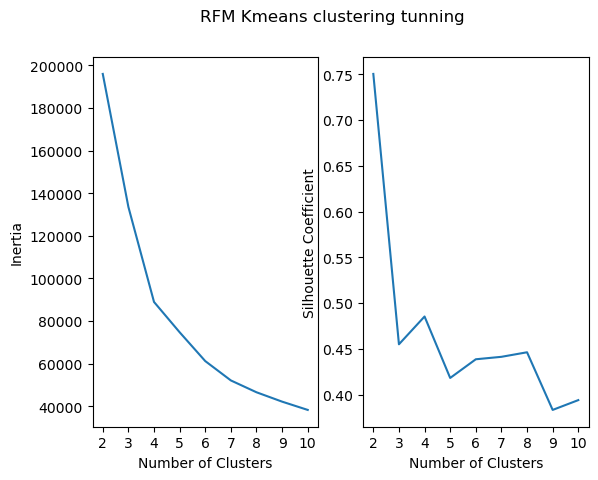

In [5]:
#Extracting RFM data
RFMcols = ["recency",
           "frequency",
           "monetary"]

data = df[RFMcols].values

#Clustering tunning
plot_KMeans_cluster_tunning(data = data,
                            cluster_max_number = 10,
                            title = 'RFM Kmeans clustering tunning')

Elbow method and silhouette coefficents both suggest a 4 clusters segmentation

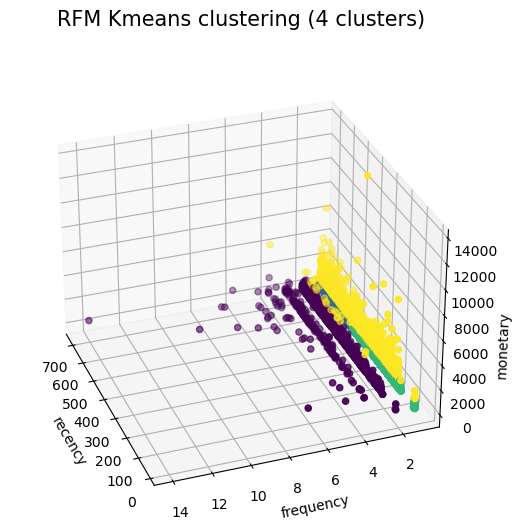

In [6]:
#Fitting 4 cluster kmeans
kmeans = KMeans(n_clusters=4)
kmeans.fit(data)

#Making 3D plot
plot_RFM_3D(labels = kmeans.labels_,
            title = "RFM Kmeans clustering (4 clusters)")


In [7]:
#Making radat plot
plot_radarplot(cluster_centers = kmeans.cluster_centers_,
               col_name = RFMcols,
               title = "RFM Kmeans clustering (4 clusters)",)


[Text(0.5, 1.0, 'monetary')]

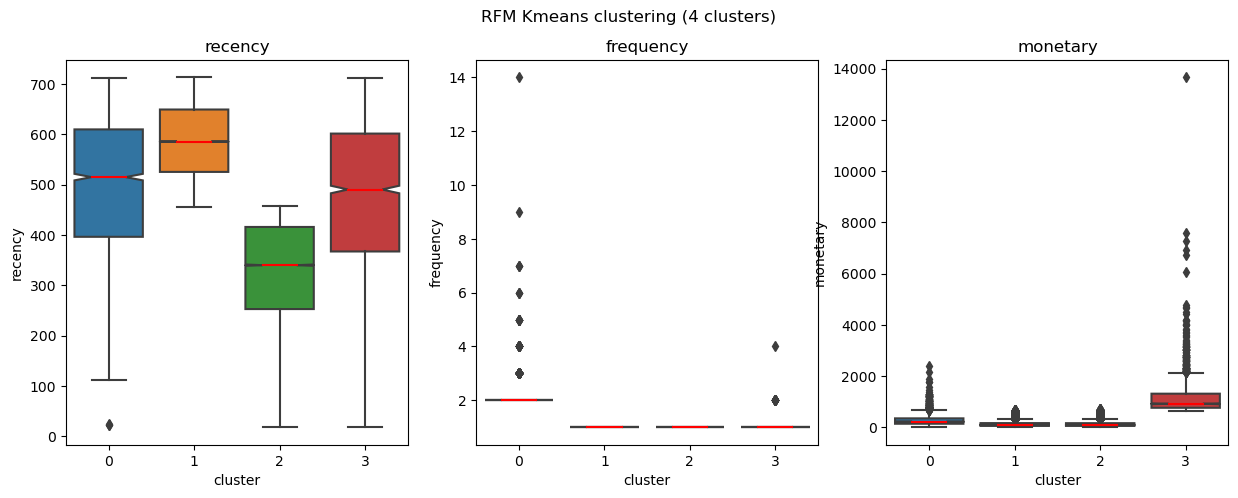

In [8]:
#Saving data
kmeansrefdf = refdf.copy()
kmeansrefdf.loc[:,"cluster"] = kmeans.labels_


#Making boxplot
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
fig.suptitle('RFM Kmeans clustering (4 clusters)')


sns.boxplot(ax = axes[0],
            data = kmeansrefdf,
            y = "recency",
            x = "cluster",
            notch = True,
            medianprops = {"color": "red"})

axes[0].set(title = 'recency')

sns.boxplot(ax = axes[1],
            data = kmeansrefdf,
            y = "frequency",
            x = "cluster",
            notch = True,
            medianprops = {"color": "red"})

axes[1].set(title = 'frequency')

sns.boxplot(ax = axes[2],
            data = kmeansrefdf,
            y = "monetary",
            x = "cluster",
            notch = True,
            medianprops = {"color": "red"})

axes[2].set(title = 'monetary')

In [9]:
#Checking cluster distribution
kmeansrefdf['cluster'].value_counts(normalize=True)

1    0.542784
2    0.401760
0    0.029222
3    0.026234
Name: cluster, dtype: float64

### RFMS segmentation

Here we test a RFMS (Recency,Frequency,Monetary,Satisfaction) segmentation with a KMeans algorythm.

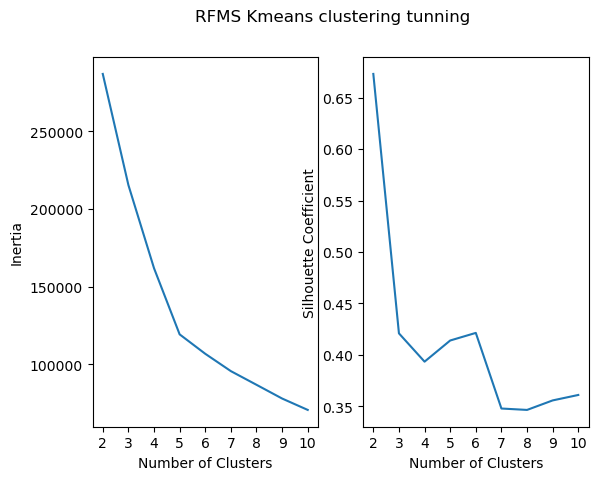

In [10]:
#Extracting RFMS data
RFMScols = ["recency",
           "frequency",
           "monetary",
           "mean_review_score"]

data = df[RFMScols].values

#Clustering tunning
plot_KMeans_cluster_tunning(data = data,
                            cluster_max_number = 10,
                            title = 'RFMS Kmeans clustering tunning')

The Elbow method suggest 5 clusters but the silhouette suggest 6, we choose 5 as it seem to be more meaningfull

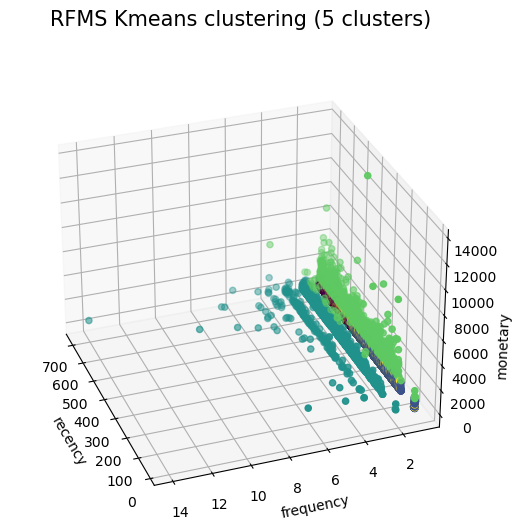

In [11]:
#Fitting data on kmeans
kmeans = KMeans(n_clusters=5)
kmeans.fit(data)

#Making 3D plot
plot_RFM_3D(labels = kmeans.labels_,
            title = "RFMS Kmeans clustering (5 clusters)")

In [12]:
#Making radat plot
plot_radarplot(cluster_centers = kmeans.cluster_centers_,
               col_name = RFMScols,
               title = "RFMS Kmeans clustering (5 clusters)",)

[Text(0.5, 1.0, 'mean_review_score')]

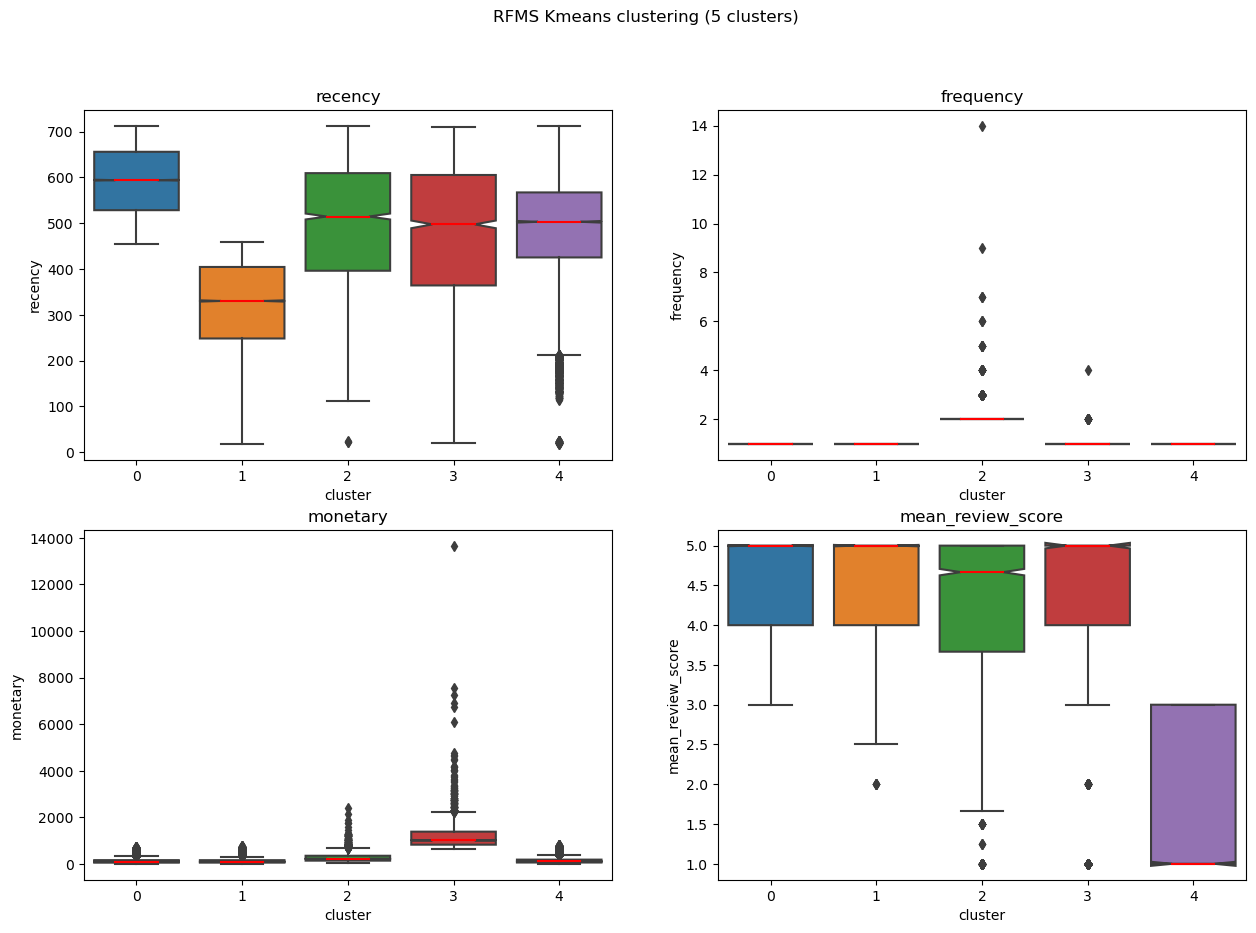

In [13]:
#Saving results
kmeansrefdf = refdf.copy()
kmeansrefdf.loc[:,"cluster"] = kmeans.labels_


#Making boxplots
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
fig.suptitle('RFMS Kmeans clustering (5 clusters)')


sns.boxplot(ax = axes[0,0],
            data = kmeansrefdf,
            y = "recency",
            x = "cluster",
            notch = True,
            medianprops = {"color": "red"})

axes[0,0].set(title = 'recency')

sns.boxplot(ax = axes[0,1],
            data = kmeansrefdf,
            y = "frequency",
            x = "cluster",
            notch = True,
            medianprops = {"color": "red"})

axes[0,1].set(title = 'frequency')

sns.boxplot(ax = axes[1,0],
            data = kmeansrefdf,
            y = "monetary",
            x = "cluster",
            notch = True,
            medianprops = {"color": "red"})

axes[1,0].set(title='monetary')

sns.boxplot(ax = axes[1,1],
            data = kmeansrefdf,
            y = "mean_review_score",
            x = "cluster",
            notch = True,
            medianprops = {"color": "red"})

axes[1,1].set(title = 'mean_review_score')


In [14]:
#Checking cluster distribution
kmeansrefdf['cluster'].value_counts(normalize = True)

0    0.442880
1    0.337032
4    0.168466
2    0.029211
3    0.022411
Name: cluster, dtype: float64

### Extented segmentation

Here we test aextended segmentation (RFMS + delivery time + number of payments + review answer time + number of comments) with a KMeans algorythm.

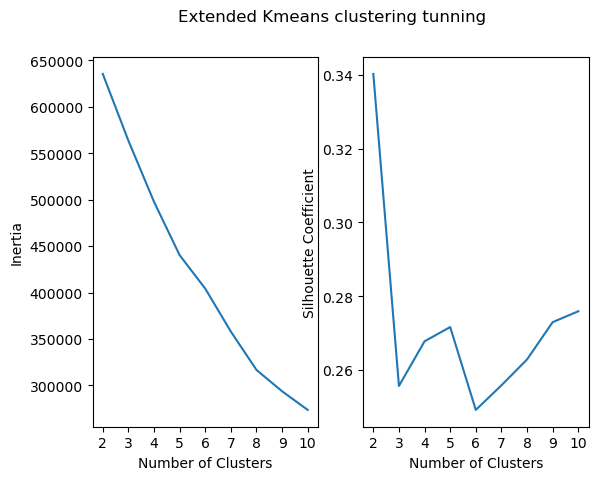

In [15]:
extended_cols = ['recency',
                 'frequency',
                 'monetary',
                 "mean_review_score",
                 "mean_delivery_time",
                 "review_comment_message_number",
                 "payment_sequential",
                 "mean_review_answer_time"]


data = df[extended_cols].values

#Clustering tunning
plot_KMeans_cluster_tunning(data = data,
                            cluster_max_number = 10,
                            title = 'Extended Kmeans clustering tunning')


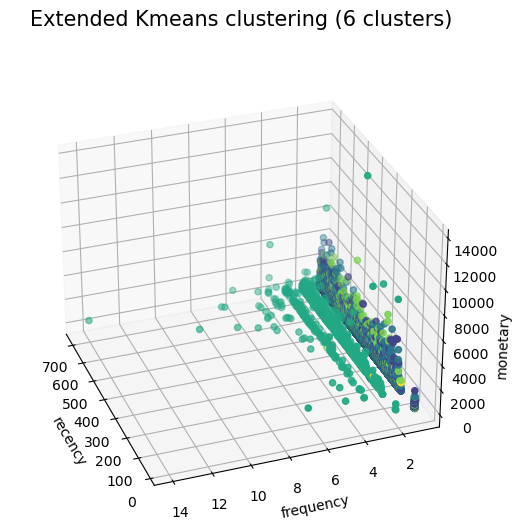

In [16]:
#Fitting data on kmeans
kmeans = KMeans(n_clusters=6)
kmeans.fit(data)

#Making 3D plot
plot_RFM_3D(labels = kmeans.labels_,
            title = "Extended Kmeans clustering (6 clusters)")


In [17]:
#Making radat plot
plot_radarplot(cluster_centers = kmeans.cluster_centers_,
               col_name = extended_cols,
               title = "Extended Kmeans clustering (6 clusters)",)

AxesSubplot(0.398529,0.653529;0.227941x0.226471)


[Text(0.5, 1.0, 'payment_sequential')]

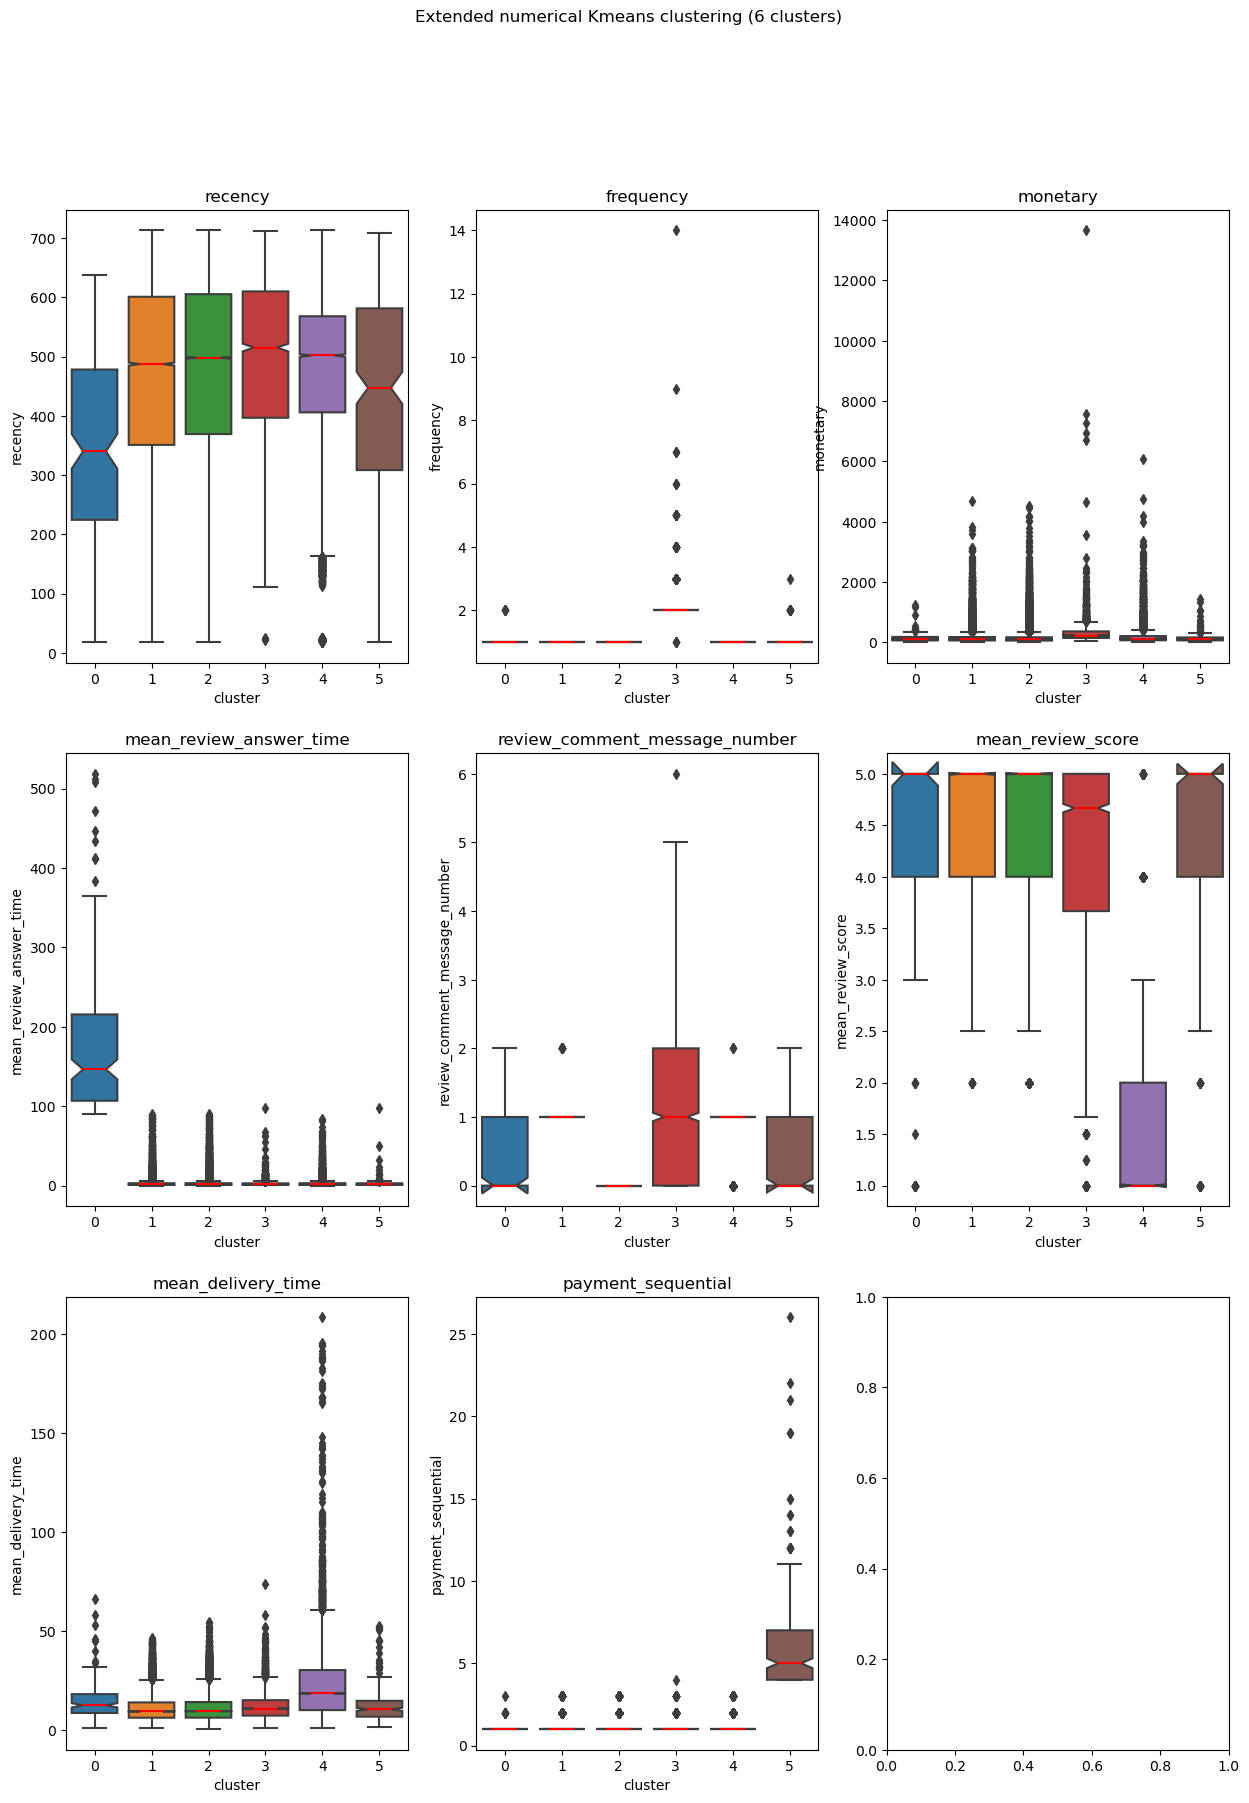

In [18]:
#Saving results
kmeansxtrefdf = refdf.copy()
kmeansxtrefdf.loc[:,"cluster"] = kmeans.labels_


#Making boxplot
fig, axes = plt.subplots(3, 3, figsize=(15, 20))
fig.suptitle('Extended numerical Kmeans clustering (6 clusters)')

print(axes[0][1])
sns.boxplot(ax = axes[0,0],
            data = kmeansxtrefdf,
            y = "recency",
            x = "cluster",
            notch = True,
            medianprops = {"color": "red"})

axes[0,0].set(title = 'recency')

sns.boxplot(ax = axes[0,1],
            data = kmeansxtrefdf,
            y = "frequency",
            x = "cluster",
            notch = True,
            medianprops = {"color": "red"})

axes[0,1].set(title = 'frequency')

sns.boxplot(ax = axes[0,2],
            data = kmeansxtrefdf,
            y = "monetary",
            x = "cluster",
            notch = True,
            medianprops = {"color": "red"})

axes[0,2].set(title = 'monetary')

sns.boxplot(ax = axes[1,0],
            data = kmeansxtrefdf,
            y = "mean_review_answer_time",
            x = "cluster",
            notch = True,
            medianprops = {"color": "red"})

axes[1,0].set(title = 'mean_review_answer_time')

sns.boxplot(ax = axes[1,1],
            data = kmeansxtrefdf,
            y = "review_comment_message_number",
            x = "cluster",
            notch = True,
            medianprops = {"color": "red"})

axes[1,1].set(title = 'review_comment_message_number')

sns.boxplot(ax = axes[1,2],
            data = kmeansxtrefdf,
            y = "mean_review_score",
            x = "cluster",
            notch = True,
            medianprops = {"color": "red"})

axes[1,2].set(title = 'mean_review_score')

sns.boxplot(ax = axes[2,0],
            data = kmeansxtrefdf,
            y = "mean_delivery_time",
            x = "cluster",
            notch = True,
            medianprops = {"color": "red"})

axes[2,0].set(title = 'mean_delivery_time')

sns.boxplot(ax = axes[2,1],
            data = kmeansxtrefdf,
            y = "payment_sequential",
            x = "cluster",
            notch = True,
            medianprops = {"color": "red"})

axes[2,1].set(title = 'payment_sequential')


In [19]:
#Checking cluster distribution
kmeansxtrefdf['cluster'].value_counts(normalize = True)

2    0.539609
1    0.286333
4    0.139893
3    0.029354
5    0.002779
0    0.002032
Name: cluster, dtype: float64

### Full segmentation

Here we a test segmentation with all our numerical features with a KMeans algorythm.

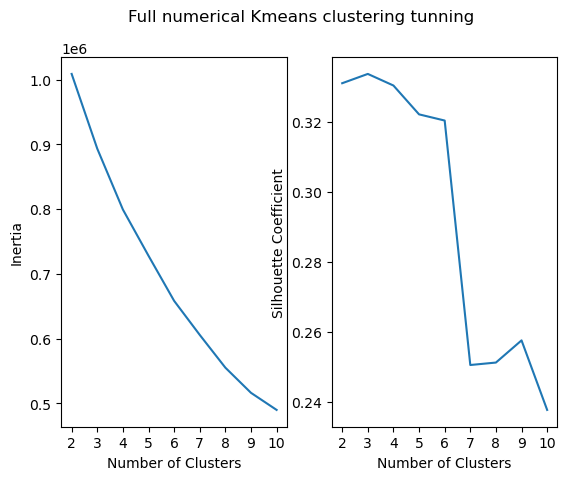

In [20]:
numerical_cols = ["recency",
                  "frequency",
                  "monetary",
                  "mean_delivery_time",
                  "mean_review_score",
                  "review_comment_message_number",
                  "payment_sequential",
                  "mean_cash_payment",
                  "mean_credit_card_payment",
                  "mean_debit_card_payment",
                  "mean_voucher_payment",
                  "mean_review_answer_time",
                  "mean_seller_customer_distance"]


data = df[numerical_cols].values

#Clustering tunning
plot_KMeans_cluster_tunning(data = data,
                            cluster_max_number = 10,
                            title = 'Full numerical Kmeans clustering tunning')


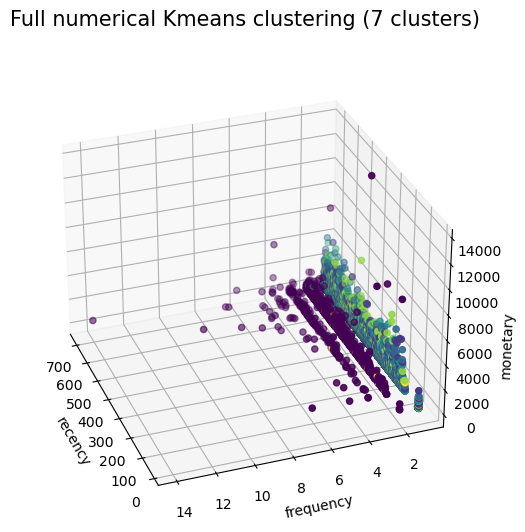

In [21]:
#Fitting data on kmeans
kmeans = KMeans(n_clusters = 7)
kmeans.fit(data)

#Making 3D plot
plot_RFM_3D(labels = kmeans.labels_,
            title = "Full numerical Kmeans clustering (7 clusters)")

In [22]:
#Making radat plot
plot_radarplot(cluster_centers = kmeans.cluster_centers_,
               col_name = numerical_cols,
               title = "Full numerical Kmeans clustering (7 clusters)",)

[Text(0.5, 1.0, 'mean_debit_card_payment')]

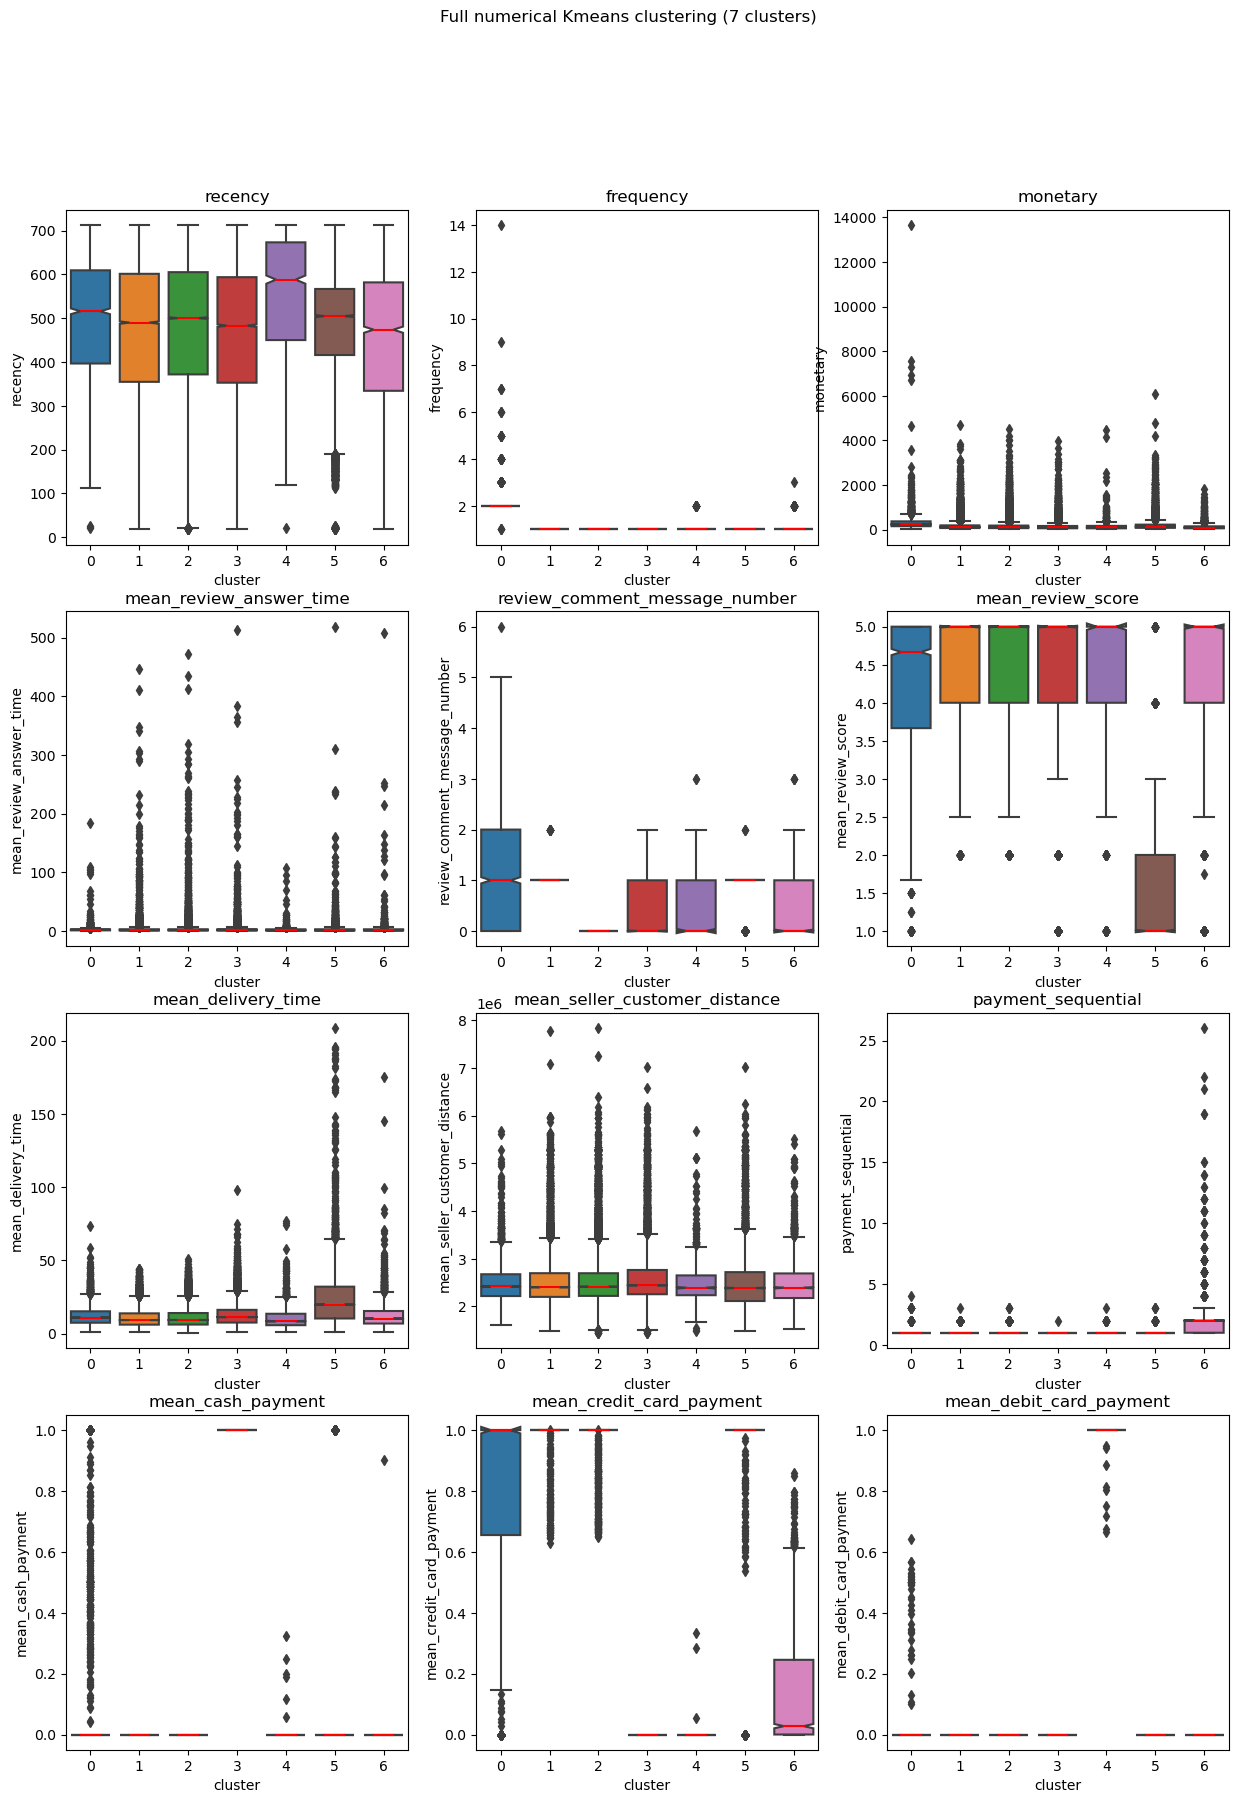

In [23]:
#Saving results
kmeansfullrefdf = refdf.copy()
kmeansfullrefdf.loc[:,"cluster"] = kmeans.labels_



#Making boxplots
fig, axes = plt.subplots(4, 3, figsize = (15, 20))
fig.suptitle('Full numerical Kmeans clustering (7 clusters)')

sns.boxplot(ax = axes[0,0],
            data = kmeansfullrefdf,
            y = "recency",
            x = "cluster",
            notch = True,
            medianprops = {"color": "red"})

axes[0,0].set(title = 'recency')

sns.boxplot(ax = axes[0,1],
            data = kmeansfullrefdf,
            y = "frequency",
            x = "cluster",
            notch = True,
            medianprops = {"color": "red"})

axes[0,1].set(title = 'frequency')

sns.boxplot(ax = axes[0,2],
            data = kmeansfullrefdf,
            y = "monetary",
            x = "cluster",
            notch = True,
            medianprops = {"color": "red"})

axes[0,2].set(title = 'monetary')

sns.boxplot(ax = axes[1,0],
            data = kmeansfullrefdf,
            y = "mean_review_answer_time",
            x = "cluster",
            notch = True,
            medianprops = {"color": "red"})

axes[1,0].set(title = 'mean_review_answer_time')

sns.boxplot(ax = axes[1,1],
            data = kmeansfullrefdf,
            y = "review_comment_message_number",
            x = "cluster",
            notch = True,
            medianprops = {"color": "red"})

axes[1,1].set(title = 'review_comment_message_number')

sns.boxplot(ax = axes[1,2],
            data = kmeansfullrefdf,
            y = "mean_review_score",
            x = "cluster",
            notch = True,
            medianprops = {"color": "red"})

axes[1,2].set(title = 'mean_review_score')

sns.boxplot(ax = axes[2,0],
            data = kmeansfullrefdf,
            y = "mean_delivery_time",
            x = "cluster",
            notch=True,
            medianprops = {"color": "red"})

axes[2,0].set(title = 'mean_delivery_time')

sns.boxplot(ax = axes[2,1],
            data = kmeansfullrefdf,
            y ="mean_seller_customer_distance",
            x = "cluster",
            notch = True,
            medianprops = {"color": "red"})

axes[2,1].set(title = 'mean_seller_customer_distance')

sns.boxplot(ax = axes[2,2],
            data = kmeansfullrefdf,
            y = "payment_sequential",
            x = "cluster",
            notch = True,
            medianprops = {"color": "red"})

axes[2,2].set(title = 'payment_sequential')

sns.boxplot(ax = axes[3,0],
            data = kmeansfullrefdf,
            y = "mean_cash_payment",
            x = "cluster",
            notch = True,
            medianprops = {"color": "red"})

axes[3,0].set(title = 'mean_cash_payment')

sns.boxplot(ax = axes[3,1],
            data = kmeansfullrefdf,
            y = "mean_credit_card_payment",
            x = "cluster",
            notch = True,
            medianprops = {"color": "red"})

axes[3,1].set(title = 'mean_credit_card_payment')

sns.boxplot(ax = axes[3,2],
            data = kmeansfullrefdf,
            y = "mean_debit_card_payment",
            x = "cluster",
            notch = True, medianprops={"color": "red"})

axes[3,2].set(title = 'mean_debit_card_payment')

In [24]:
#Checking cluster distribution
kmeansfullrefdf['cluster'].value_counts(normalize = True)

2    0.408472
1    0.216870
3    0.190877
5    0.107056
6    0.032836
0    0.028596
4    0.015292
Name: cluster, dtype: float64

### Full segmentation with DBScan

Here we test a segmentation with all our numerical features with a DBScan algorythm.

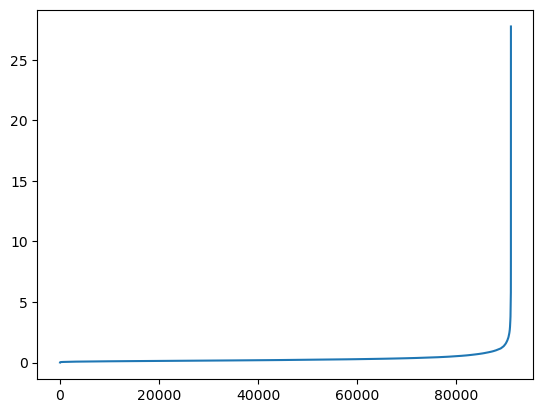

In [25]:
#Searching for optimal epsilon hyperparameter
neigh = NearestNeighbors(n_neighbors = 2)
nbrs = neigh.fit(data)
distances, indices = nbrs.kneighbors(data)
distances = np.sort(distances, axis = 0)
distances = distances[:,1]
plt.plot(distances)

The optimal epsilon hyperparameter seems to be around 2

In [26]:
#Fitting data
y_pred = DBSCAN(eps = 2, min_samples = 50,n_jobs = -1).fit_predict(data)

#Saving results
dbscanfullrefdf = refdf.copy()
dbscanfullrefdf.loc[:,"cluster"] = y_pred

#Checking cluster distribution
dbscanfullrefdf['cluster'].value_counts(normalize = True)

 0    0.716612
 1    0.190658
-1    0.024960
 4    0.022048
 2    0.020587
 3    0.013908
 5    0.010063
 6    0.001164
Name: cluster, dtype: float64

The repartition between the clusters is visibly too inhomogeneous and the outlier cluster is too big to draw any further conclusions

### Full segmentation + categorical features

Here we test a segmentation with all our numerical and categorical features with a Kprototype algorythm.

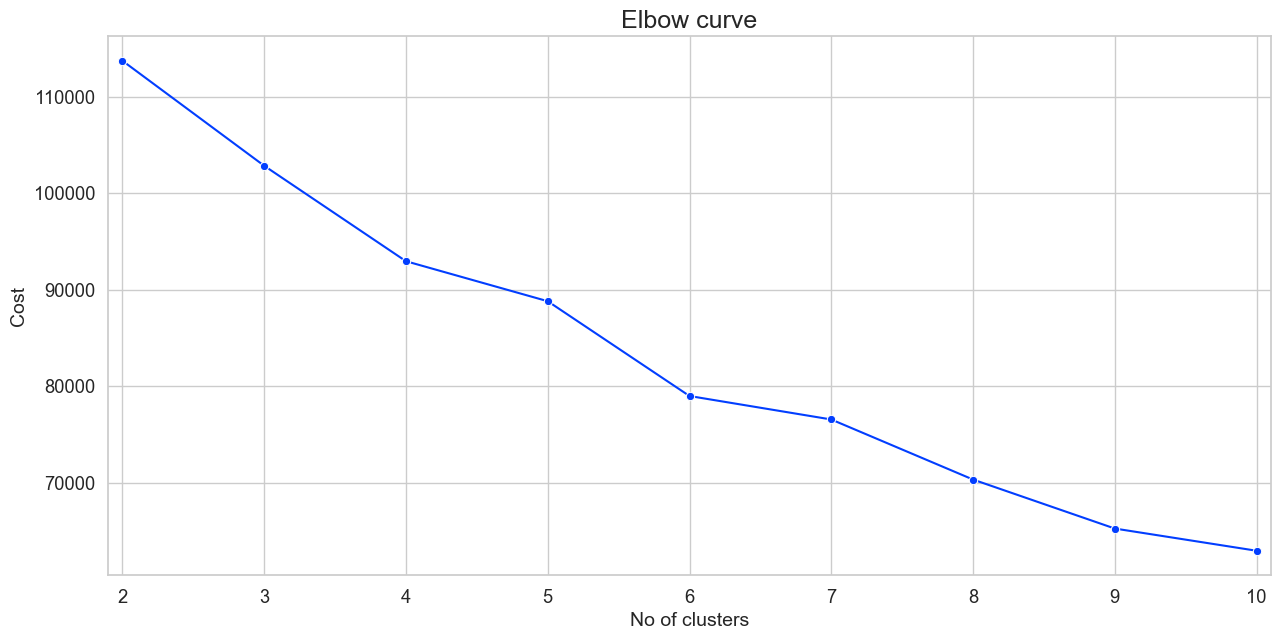

In [27]:
#KPrototype

smart_array = df.drop(columns=["customer_unique_id"]).values

#Index of categorical columns
categorical_index = list(range(10,15))

#Selecting subsample
smart_array_subsample, test = train_test_split(smart_array, test_size=0.9,random_state = 42)

def plot_elbow_curve(start, end, data):
    
    """Display the evolution of inertias for a KPrototypes segmentation with different cluster numbers

    Positional arguments : 
    -----------------------------------
    start : lower range for display
    end : upper range for display
    data : np.array to be fitted with Kmeans
    """

    
    no_of_clusters = list(range(start, end+1))
    cost_values = []
    
    for k in no_of_clusters:
        test_model = KPrototypes(n_clusters = k,
                                 init = 'Huang',
                                 random_state = 42)
        
        test_model.fit_predict(data,
                               categorical = categorical_index)
        
        cost_values.append(test_model.cost_)
        
    sns.set_theme(style = "whitegrid",
                  palette = "bright",
                  font_scale = 1.2)
    
    plt.figure(figsize = (15, 7))
    
    ax = sns.lineplot(x = no_of_clusters,
                      y = cost_values,
                      marker = "o",
                      dashes = False)
    
    ax.set_title('Elbow curve', fontsize = 18)
    ax.set_xlabel('No of clusters', fontsize = 14)
    ax.set_ylabel('Cost', fontsize = 14)
    ax.set(xlim = (start-0.1, end+0.1))
    plt.plot();
    
#Plotting elbow curve from k=2 to k=10
plot_elbow_curve(2,10,smart_array_subsample)

The inflexion point seems to be around 4 clusters

In [28]:
#Fitting data
kproto = KPrototypes(n_clusters = 4,
                     init = 'Huang',
                     random_state = 42,
                     n_jobs = -1)

clusters = kproto.fit_predict(smart_array,
                              categorical=categorical_index)

#New column for cluster labels associated with each subject
kprotofullrefdf = refdf.copy()
kprotofullrefdf.loc[:,"cluster"] = clusters
kprotofullrefdf['cluster'] = kproto.labels_

AxesSubplot(0.398529,0.712609;0.227941x0.167391)


[Text(0.5, 1.0, 'mean_debit_card_payment')]

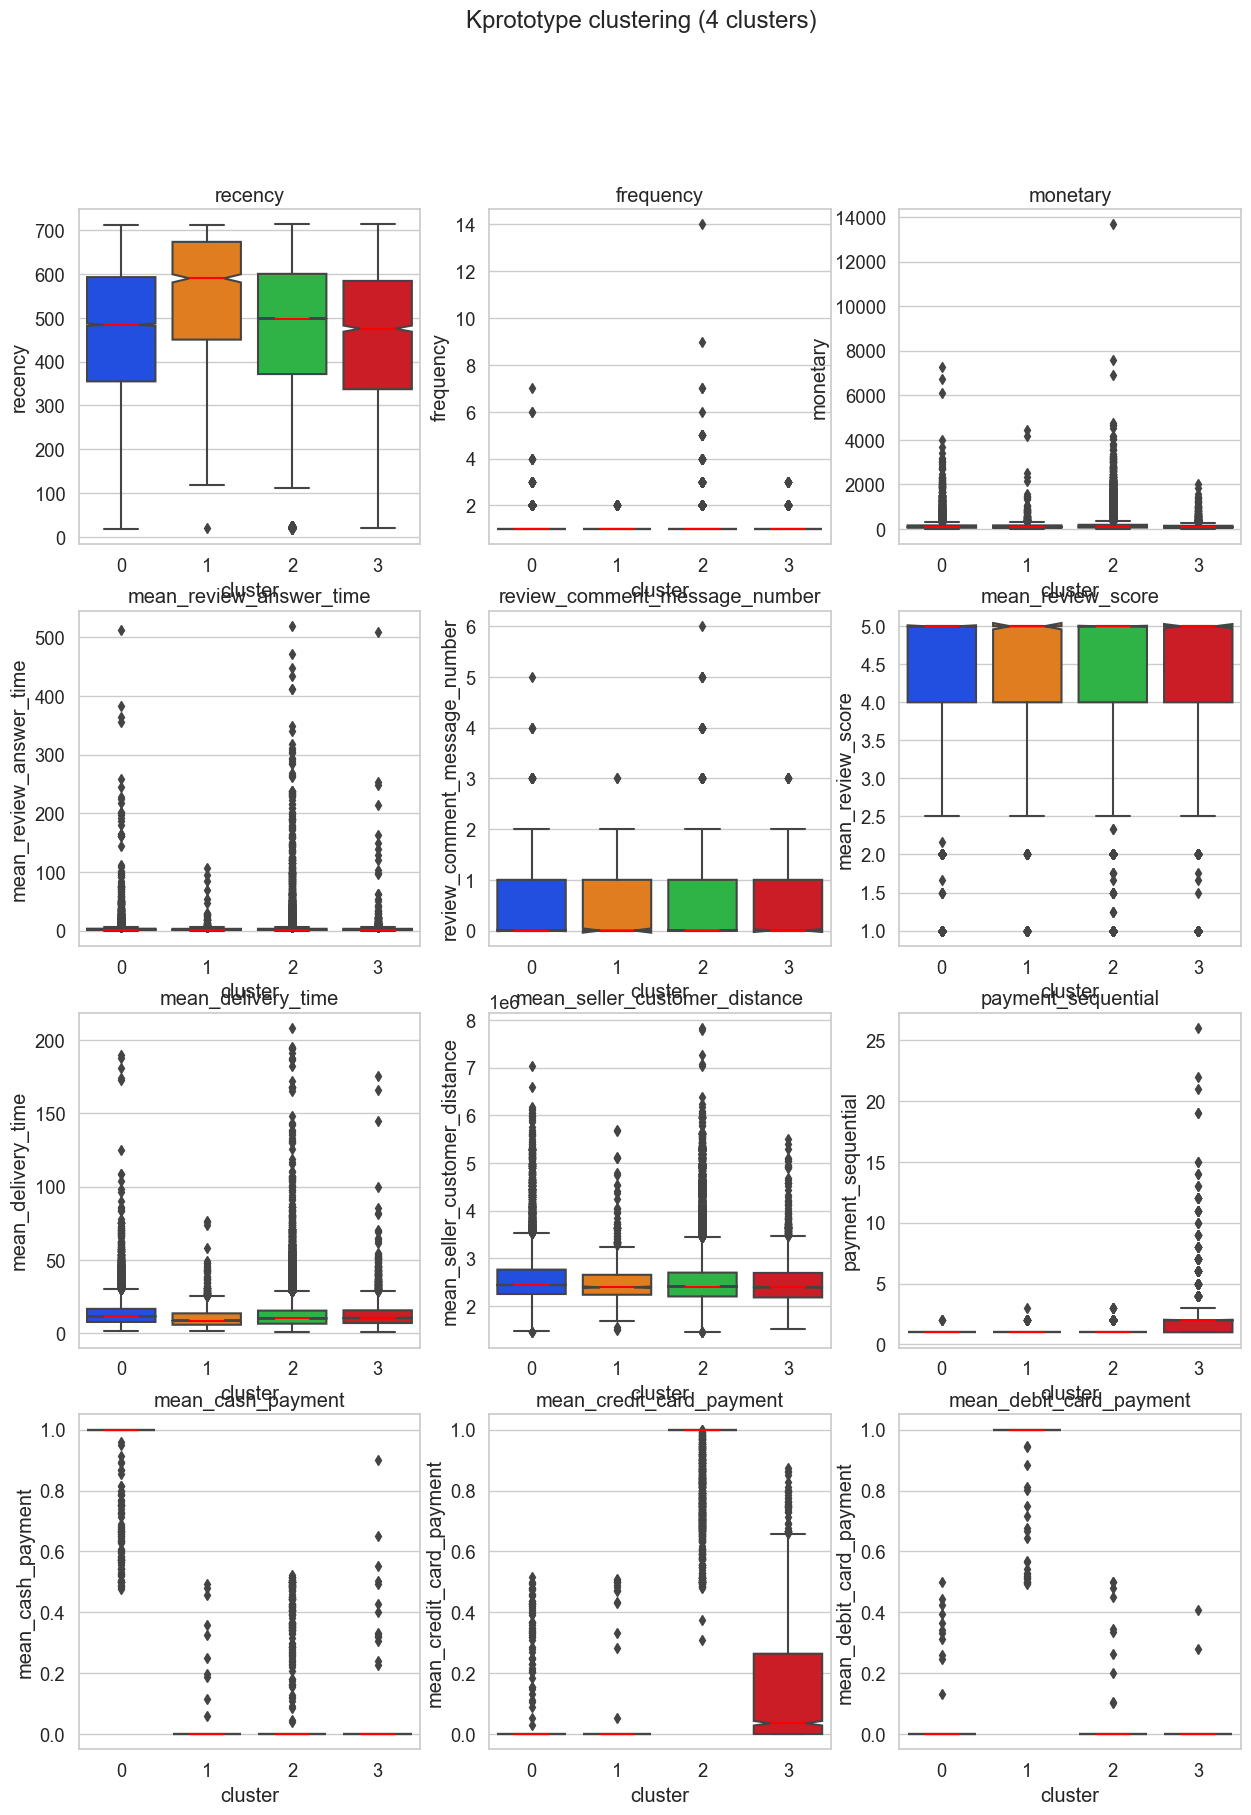

In [29]:
#Making boxplot
fig, axes = plt.subplots(4, 3, figsize = (15, 20))
fig.suptitle('Kprototype clustering (4 clusters)')

print(axes[0][1])
sns.boxplot(ax = axes[0,0],
            data = kprotofullrefdf,
            y = "recency",
            x = "cluster",
            notch = True,
            medianprops = {"color": "red"})

axes[0,0].set(title = 'recency')

sns.boxplot(ax = axes[0,1],
            data = kprotofullrefdf,
            y = "frequency",
            x = "cluster",
            notch = True,
            medianprops = {"color": "red"})

axes[0,1].set(title = 'frequency')

sns.boxplot(ax = axes[0,2],
            data = kprotofullrefdf,
            y = "monetary",
            x = "cluster",
            notch = True,
            medianprops = {"color": "red"})

axes[0,2].set(title = 'monetary')

sns.boxplot(ax = axes[1,0],
            data = kprotofullrefdf,
            y = "mean_review_answer_time",
            x = "cluster",
            notch = True,
            medianprops = {"color": "red"})

axes[1,0].set(title = 'mean_review_answer_time')

sns.boxplot(ax = axes[1,1],
            data = kprotofullrefdf,
            y = "review_comment_message_number",
            x = "cluster",
            notch = True,
            medianprops = {"color": "red"})

axes[1,1].set(title = 'review_comment_message_number')

sns.boxplot(ax = axes[1,2],
            data = kprotofullrefdf,
            y = "mean_review_score",
            x = "cluster",
            notch = True,
            medianprops = {"color": "red"})

axes[1,2].set(title = 'mean_review_score')

sns.boxplot(ax = axes[2,0],
            data = kprotofullrefdf,
            y = "mean_delivery_time",
            x = "cluster",
            notch = True,
            medianprops = {"color": "red"})

axes[2,0].set(title = 'mean_delivery_time')

sns.boxplot(ax = axes[2,1],
            data = kprotofullrefdf,
            y = "mean_seller_customer_distance",
            x = "cluster",
            notch = True,
            medianprops = {"color": "red"})

axes[2,1].set(title = 'mean_seller_customer_distance')

sns.boxplot(ax = axes[2,2],
            data = kprotofullrefdf,
            y = "payment_sequential",
            x = "cluster",
            notch = True,
            medianprops = {"color": "red"})

axes[2,2].set(title = 'payment_sequential')

sns.boxplot(ax = axes[3,0],
            data = kprotofullrefdf,
            y = "mean_cash_payment",
            x = "cluster",
            notch = True,
            medianprops = {"color": "red"})

axes[3,0].set(title = 'mean_cash_payment')

sns.boxplot(ax = axes[3,1],
            data = kprotofullrefdf,
            y = "mean_credit_card_payment",
            x = "cluster",
            notch = True,
            medianprops = {"color": "red"})

axes[3,1].set(title = 'mean_credit_card_payment')

sns.boxplot(ax = axes[3,2],
            data = kprotofullrefdf,
            y = "mean_debit_card_payment",
            x = "cluster",
            notch = True,
            medianprops = {"color": "red"})

axes[3,2].set(title = 'mean_debit_card_payment')

This segmentation seems to not be significative

## Conclusion :

The best segmentation we have so far is the RFMS one with the KMeans algorythm. 